
Привет еще раз, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>







<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за очередную качественную работу - видно, что приложено много усилий,
- Я оставил некоторые советы, надеюсь они будут полезными и интересными
- Есть некоторые недочеты, которые нужно поправить, но у тебя это не должно занять много времени)
- Жду обновленную работу

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за усердность!
- Было приятно с тобой сотрудничать.
- Недочеты исправлены - работа полностью корректна
- Не буду больше задерживать, продолжай в том же духе.


# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

###  Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder 
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


In [2]:
data = pd.read_csv('/datasets/autos.csv')
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


- DateCrawled, DateCreated можно убрать, не влияет на обучение
- NumberOfPictures имеет лишь нулевые значения. Иррелевантный признак, можно убрать.
- PostalCode не будет иметь ценности для обучения
- RegistrationMonth тоже лишняя информация, года достаточно
- LastSeen активность пользователя не влияет на формирование цены

In [5]:
data_ml = data.drop(['DateCreated', 'DateCrawled', 'NumberOfPictures', 'PostalCode', 'RegistrationMonth', 'LastSeen'], axis=1)

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - верное решение.
</div>


### Предобработка данных

Посмотрим на дубликаты(явные и неявные):

In [6]:
display(data_ml.duplicated().sum())
data_ml = data_ml.drop_duplicates()

45040

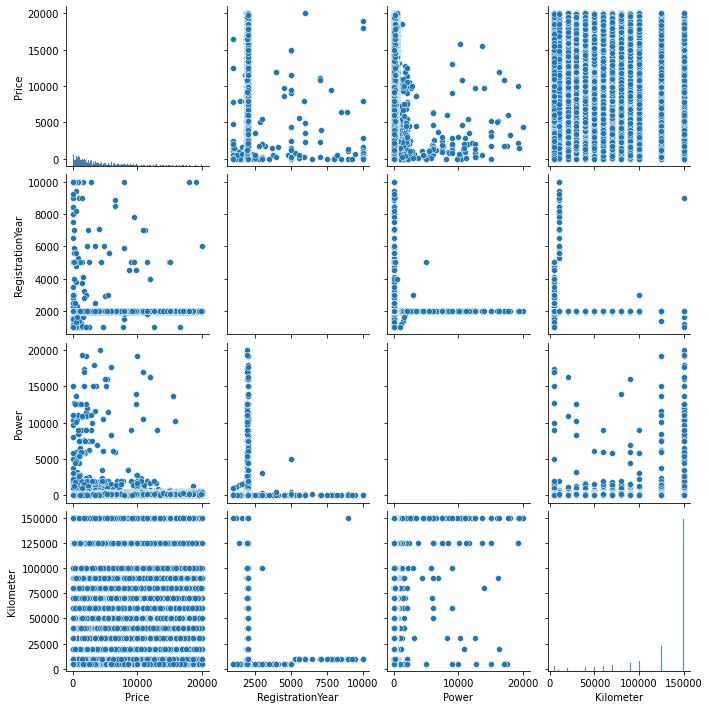

In [7]:
sns.pairplot(data_ml)

- Явных зависимостей нет

In [8]:
features = ['Price','RegistrationYear','Power','Kilometer']

In [9]:
def histprint(feature):
    plt.figure(figsize=(20,5))
    ax1 = plt.subplot(1,2,1)
    ax1.set_title(f'Диаграмма размаха {feature}')
    ax1 = sns.boxplot(data_ml[feature])
    ax2 = plt.subplot(1,2,2)
    ax2.set_title(f'Распределение {feature}')
    ax2 = sns.histplot(data_ml[feature], kde=True, bins=30)

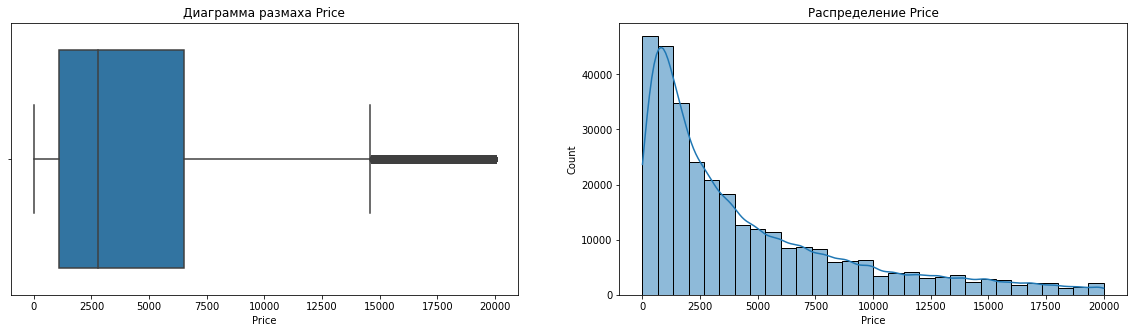

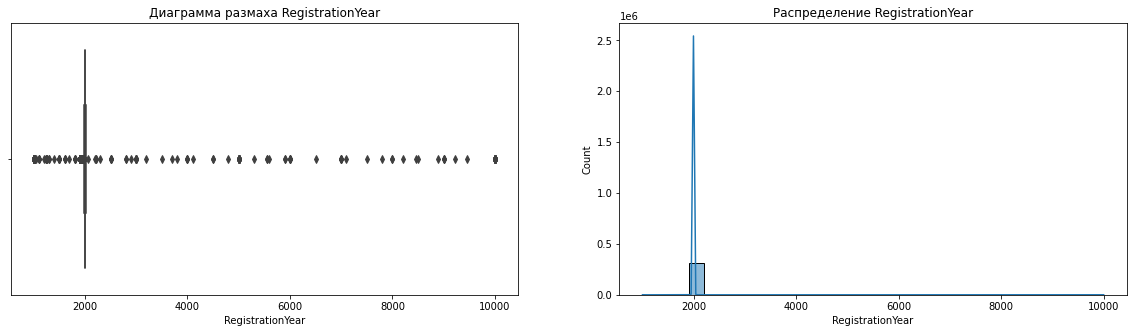

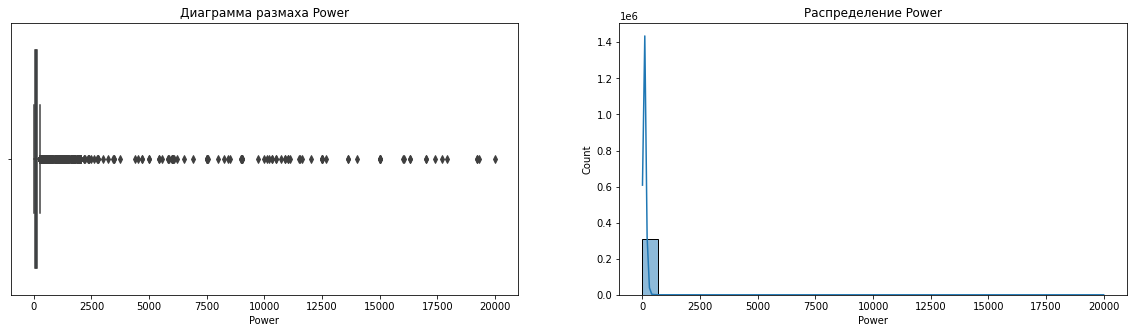

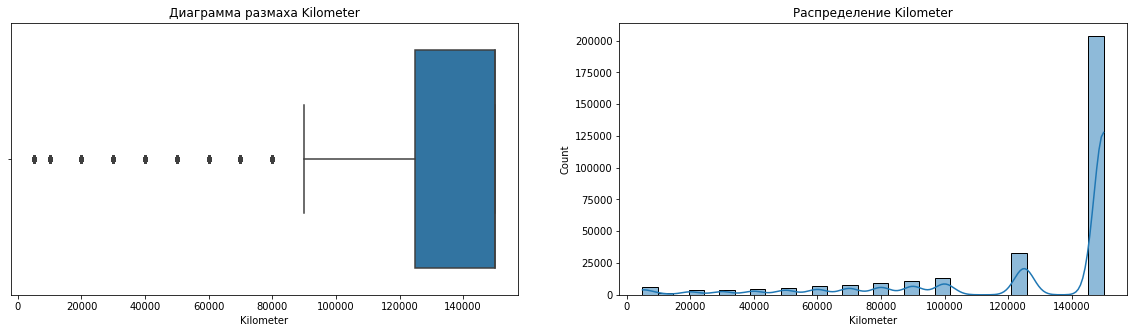

In [10]:
for i in features:
    histprint(i)

In [11]:
data_ml.describe()

,Price,RegistrationYear,Power,Kilometer
count,309329.000000,309329.000000,309329.000000,309329.000000
mean,4486.937196,2004.360105,110.976908,127217.735809
std,4564.852796,92.541399,200.969473,38532.941010
min,0.000000,1000.000000,0.000000,5000.000000
25%,1100.000000,1999.000000,69.000000,125000.000000
50%,2800.000000,2003.000000,105.000000,150000.000000
75%,6500.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


In [12]:
data_ml.isna().sum()

Price                   0
VehicleType         34559
RegistrationYear        0
Gearbox             17207
Power                   0
Model               18361
Kilometer               0
FuelType            30764
Brand                   0
Repaired            64558
dtype: int64

- Вызывают опасения некоторые признаки: например, у целевого признака Price есть нулевые значения - не может же машина продаваться бесплатно? Да и наверняка все, что дешевле 50 евро - нерелевантно(5000 рублей? Что это за машина такая...).
- Registration Year имеет странные минимумы и максимумы.
- Power тоже.
- VehicleType, Gearbox, Model, FuelType, Repaired - все эти признаки имеют пропущенные значения.


<div class="alert alert-block alert-info">
<b>Совет </b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Оки
</div>


<div class="alert alert-block alert-success">
<b>Ревьювер[2]:</b> Спасибо за оперативность, приятно видеть фидбек. Рад был быть полезен. Удачи в дальнейшем обучении!
</div>


- Price

In [13]:
data_ml.loc[data_ml['Price'] <= 50, 'Price'].count()

10739

In [14]:
print(10739 / 309329 * 100, '%')

3.4717081166007713 %


12220 значений меньше или равных 100 в признаке "Price". Есть несколько опций - заменить мединными значениями(более устойчиво к выбросам, чем то же среднее) или просто удалить данные объекты. Последний вариант более предпочтителен, так как объектов с такой ценой всего около 3.5%.

In [15]:
data_ml = data_ml.loc[data_ml['Price'] > 50]
data_ml.loc[data['Price'] <= 50, 'Price'].count()

0


<div class="alert alert-block alert-success">
<b>Успех:</b>  Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Но я  все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div>


- Model

In [16]:
data_ml.loc[data['Model'].isna(), 'Price'].count()

16322

In [17]:
print(16322 / 309329 * 100, '%')

5.276582538332972 %


Имеем 16322 пропусков в столбце 'Model'. Чуть больше 5%. Опять же, лучше удалить эти признаки, сильно на качество обучения не повлияет.

In [18]:
data_ml = data_ml.loc[~data['Model'].isna()]
data_ml.loc[data['Model'].isna(), 'Price'].count()

0

- Power

Уберем объекты с мощностью меньше 10 л.с. и больше 1000 л.с.(1000 сил у Вейрона, к примеру, но при максимальной цене в датасете 20к евро...)

In [19]:
data_ml.loc[(data_ml['Power'] <= 10) | (data_ml['Power'] > 1000), 'Price'].count()

27915

In [20]:
print(27915 / 309329 * 100, '%')

9.024372108661005 %


In [21]:
data_ml = data_ml.loc[~((data_ml['Power'] <= 10) | (data_ml['Power'] > 1000))]
data_ml.loc[(data_ml['Power'] <= 10) | (data_ml['Power'] > 1000), 'Price'].count()

0



<div class="alert alert-block alert-info">
<b>Совет:</b>  Вопрос на подумать: Как думаешь а машины с 0-ой мощностью могут быть просто без двигателя?
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> В теории да, но я сомневаюсь, что их аж 27 тысяч. Я лично ни разу на сайтах по продаже автомобилей не видел авто без двигателей.
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Да, наверное это уже больше к разделу автозапчасти подходит
</div>


- Registration Year

Ограничимся текущим годом и началом второй половины 20-го века

In [22]:
data['DateCreated'].max()

'2016-04-07 00:00:00'

In [23]:
data_ml.loc[(data_ml['RegistrationYear'] > 2016) | (data_ml['RegistrationYear'] < 1950), 'Price'].count()

8408

In [24]:
data_ml = data_ml.loc[(data_ml['RegistrationYear'] <= 2016) & (data_ml['RegistrationYear'] >= 1950)]
data_ml.loc[(data_ml['RegistrationYear'] > 2016) | (data_ml['RegistrationYear'] < 1950), 'Price'].count()

0

<div class="alert alert-block alert-info">
<b>Совет:</b> Советую посмотреть на дату выгрузки анкет - там тоже можно увидеть полезную информацию по поводу границ года регистраци.
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Вижу, что анкеты максимум в 2016 году. Можно ограничиться этим годом.
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Верно


- VehicleType, Gearbox и FuelType

In [25]:
display(data_ml.loc[data['VehicleType'].isna()])
display(data_ml.loc[data['Gearbox'].isna(), 'Price'].count())
data_ml.loc[data['FuelType'].isna(), 'Price'].count()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
16,300,NaN,2016,NaN,60,polo,150000,petrol,volkswagen,NaN
31,899,NaN,2016,manual,60,clio,150000,petrol,renault,NaN
35,350,NaN,2016,manual,75,golf,150000,petrol,volkswagen,no
52,1400,NaN,2016,manual,55,other,5000,NaN,hyundai,NaN
71,2300,NaN,1997,manual,150,5er,150000,NaN,bmw,no
...,...,...,...,...,...,...,...,...,...,...
354068,3700,NaN,2016,manual,90,golf,150000,gasoline,volkswagen,NaN
354100,600,NaN,2016,manual,170,vectra,150000,petrol,opel,yes
354107,395,NaN,2016,manual,60,golf,150000,petrol,volkswagen,NaN
354115,299,NaN,2016,manual,60,astra,150000,petrol,opel,yes


4436

12325

Значения этих трех признаков можно заполнить по моделям - самые встречающиеся данные по моделям внести в соответствующие признаки.

- VehicleType, Gearbox, Model, FuelType, Repaired

Все эти признаки имеют довольно большое количество пропусков. В теории можно было бы удалить пропущенные модели(18к пропусков приемлемо), а остальные признаки заполнить самым часто встречающимся значением среди модели. Но это будет искажать информацию, так как остальные значения будут еще больше перекрываться. На примере модели 'golf' видно, что к седану добавятся лишние 2483 объекта, что примерно равно числу объектов во второй и в третьей категориях(small, wagon). Поэтому оптимальным будет все пропуски заполнить значением 'unknown'(что эквивалентно NaN, но читается лучше + с NaN, в отличие от None, можно работать численно, так как тип у этой штуки float64)

In [26]:
data_ml.loc[data['Model'] == 'golf', 'VehicleType'].value_counts()

sedan          10513
small           2763
wagon           2455
convertible     1527
bus              680
coupe            356
other            153
suv               21
Name: VehicleType, dtype: int64

In [27]:
data_ml.loc[(data_ml['Model'] == 'golf') & (data_ml['VehicleType'].isna()), 'Price'].count()

1348

In [28]:
for i in ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Repaired', 'Brand']:
    data_ml[i] = data_ml[i].fillna('unknown')

In [29]:
print(data_ml.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245945 entries, 2 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             245945 non-null  int64 
 1   VehicleType       245945 non-null  object
 2   RegistrationYear  245945 non-null  int64 
 3   Gearbox           245945 non-null  object
 4   Power             245945 non-null  int64 
 5   Model             245945 non-null  object
 6   Kilometer         245945 non-null  int64 
 7   FuelType          245945 non-null  object
 8   Brand             245945 non-null  object
 9   Repaired          245945 non-null  object
dtypes: int64(4), object(6)
memory usage: 20.6+ MB
None


In [30]:
data_ml['FuelType'].unique()

array(['gasoline', 'petrol', 'unknown', 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [31]:
data_ml.loc[data['FuelType'] == 'gasoline', 'FuelType'] = 'petrol'
data_ml['FuelType'].unique()

array(['petrol', 'unknown', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
      dtype=object)

<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски обработаны хорошим образом
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b> У fuel_type есть категории, которые означают одно и тоже - их можно объединить, либо подумать может они действительно означают, что-то разное.
</div>

<div class="alert alert-block alert-warning">
<b>Исправил:</b> Gasoline и Petrol - одно и то же. Можно объединить.
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Да-да
</div>

In [32]:
print(254306 / 354369 * 100, '% данных осталось от изначального количества')

71.76304925092207 % данных осталось от изначального количества


**Выводы:**
- Данные успешно загружены
- Удалены ненужные для обучения столбцы
- Исследованы распредления признаков и их зависимость от целевого
- Удалены дубликаты
- Данные очищены от "мусора" - заведомо неверных.
- Несмотря на то, что удалено 30% данных, все стало сильно лучше. Удаленные данные были заведомо плохими и могли испортить обучение. 


<div class="alert alert-block alert-success">
<b>Успех:</b> В целом хорошая, детальная предобработка - идем дальше
</div>

## Обучение моделей

### Разделение выборки на обучающую, валидационную и тестовую

In [33]:
state = 12345

In [34]:
features = data_ml.drop(['Price'], axis=1)
target = data_ml['Price']

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                      test_size=0.25, train_size=0.75, random_state = state)

### Преобразование категориальных признаков

Преобразуем категориальные признаки.

In [35]:
data_before_ml = data_ml.copy() # сохраним на всякий случай до кодирования признаков

In [36]:
for i in ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Repaired']: 
    display(len(data_ml[i].unique()))

9

3

249

7

3

В 'Model' много признаков. Если мы применим OHE, то размер нашего датасета сильно вырастет. Преобразуем с помощью OrdinalEncoding. Модели будут занумерованы в алфавитном порядке.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хороший выбор

In [37]:
encoder = OrdinalEncoder(handle_unknown='ignore')
encoder.fit(features_train[['Model']])
features_train['Model'] = encoder.transform(features_train[['Model']])
features_test['Model'] = encoder.transform(features_test[['Model']])
features_train

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
98958,unknown,2016,manual,75,50.0,150000,petrol,citroen,yes
110141,sedan,1996,manual,235,15.0,150000,petrol,bmw,no
87002,wagon,2004,manual,110,166.0,150000,petrol,peugeot,no
162263,wagon,2004,manual,130,154.0,150000,petrol,ford,no
13955,small,2003,manual,109,28.0,150000,petrol,audi,no
...,...,...,...,...,...,...,...,...,...
112840,sedan,1992,manual,116,166.0,150000,lpg,ford,yes
180676,convertible,2007,manual,105,42.0,125000,petrol,opel,no
176414,wagon,2006,manual,105,170.0,150000,petrol,volkswagen,no
101482,small,2001,manual,60,176.0,30000,petrol,fiat,unknown


<div class="alert alert-block alert-danger">

<b>Ошибка:</b> Отмечу, что encoder правильно применять после разбиения данных и обучать только на обучающей выборке, для остальных выборок просто использовать transform. Примеры использования с объяснениями можно найти посмотреь https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

И не забывай использовать параметр `handle_unknown`
  
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Поправил
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Есть контакт
</div>

Остальные признаки можно спокойно закодировать OHE

In [38]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)
features_test = features_test.reindex(columns = features_train.columns, fill_value=0)

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Также как аналог pd.get_dummies хочу посоветовать обратить внимание на OneHotEncoder от sklearn (это более сложный и продвинутый инструмент). Здесь можно посмотреть примеры https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий:</b> попытался поправить, но выдает разнообразные ошибки. Можете, пожалуйста, привести пример рабочего кода? Я на досуге попытаюсь разобраться.
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Так, по ссылке же рабочий код. Ошибки, которые ты встретил могли возникнуть с версией используемого тобою пакета
    
Пропиши в начале проекта перед импортами `!pip install scikit-learn==1.1.3` - команду, чтобы у тебя правильно работала нужная библиотека.
</div>

Масштабирование

In [39]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler обучен только на трейне
</div>

**Мини-выводы:**
- Разделили выборку на обучающую, валидационную и тестовую в соотношении 60:20:20
- Отмасштабировали признаки StandardScaler'ом

## Анализ моделей

In [40]:
def rmse(target, prediction):
    return mse(target, prediction, squared=False)
rmse_scorer = make_scorer(rmse, greater_is_better=False)

### Дамми-модель

In [41]:
%%time
dummy = DummyRegressor()
dummy.fit(features_train, target_train)
dummy_pred = dummy.predict(features_test)
print('RMSE Dummy:', rmse(target_test, dummy_pred))

RMSE Dummy: 4650.057238925401
CPU times: user 2.33 ms, sys: 57 µs, total: 2.38 ms
Wall time: 1.87 ms


### Линейная регрессия

Для поиска лучшей модели воспользуемся кросс-валидацией.

In [42]:
%%time
lg_model = LinearRegression()
cross_val_score(lg_model, features_train, target_train, cv=5, scoring=rmse_scorer).mean()*(-1)

CPU times: user 7.41 s, sys: 4.81 s, total: 12.2 s
Wall time: 12.4 s


2837.276838344142

- RMSE больше 2500, цель не достигнута, двигаемся дальше.

### LightGBM

In [43]:
%%time
lgbm_model = LGBMRegressor(n_jobs=-1, random_state=state)
parameters = {'learning_rate': [0.1, 0.3], 'max_depth': [12, 15]}
gridsearch_model = GridSearchCV(n_jobs=-1, cv=5, estimator=lgbm_model, param_grid=parameters, scoring=rmse_scorer)
gridsearch_model.fit(features_train, target_train)
display(gridsearch_model.best_params_)
display(gridsearch_model.best_score_)
display(gridsearch_model.cv_results_)

{'learning_rate': 0.3, 'max_depth': 12}

-1634.1107698633184

{'mean_fit_time': array([415.29299526, 112.68315639,   4.93258424,   5.1051158 ]),
 'std_fit_time': array([ 50.65534527, 146.57890129,   0.23270359,   0.19469971]),
 'mean_score_time': array([0.40398054, 0.39715066, 0.24811349, 0.29403806]),
 'std_score_time': array([0.00103725, 0.00296331, 0.04219195, 0.00394176]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.3, 0.3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[12, 15, 12, 15],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1, 'max_depth': 12},
  {'learning_rate': 0.1, 'max_depth': 15},
  {'learning_rate': 0.3, 'max_depth': 12},
  {'learning_rate': 0.3, 'max_depth': 15}],
 'split0_test_score': array([-1659.78046137, -1655.71515432, -1604.33287492, -1611.24542795]),
 'split1_test_score': array([-1686.54785714, -1688.18561335, -1638.63073095, -1633

CPU times: user 44min 27s, sys: 15.2 s, total: 44min 42s
Wall time: 45min 2s


- Порог в 2500 RMSE преодолен

### Catboost


In [44]:
%%time
parameters = {'learning_rate': [0.05, 0.1],
        'depth': [6, 12]}
cat_model = CatBoostRegressor(random_state=state, logging_level='Silent')
gridsearch_model_cat = GridSearchCV(n_jobs=-1, cv=5, estimator=cat_model, param_grid=parameters, scoring=rmse_scorer)
gridsearch_model_cat.fit(features_train, target_train)
display(gridsearch_model_cat.best_params_)
display(gridsearch_model_cat.best_score_)
display(gridsearch_model_cat.cv_results_)

{'depth': 12, 'learning_rate': 0.1}

-1566.627699028347

{'mean_fit_time': array([23.79615555, 23.36545458, 82.58641567, 82.50509243]),
 'std_fit_time': array([0.36429281, 0.21331258, 1.90685691, 2.32189275]),
 'mean_score_time': array([0.59383564, 0.5942842 , 0.81072364, 0.8809443 ]),
 'std_score_time': array([0.00901312, 0.00827004, 0.01509325, 0.05015103]),
 'param_depth': masked_array(data=[6, 6, 12, 12],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.05, 0.1, 0.05, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'depth': 6, 'learning_rate': 0.05},
  {'depth': 6, 'learning_rate': 0.1},
  {'depth': 12, 'learning_rate': 0.05},
  {'depth': 12, 'learning_rate': 0.1}],
 'split0_test_score': array([-1614.29738072, -1578.98752749, -1550.66337144, -1549.28188845]),
 'split1_test_score': array([-1637.27405846, -1600.78907906, -1571.92651448, -1561.98499706]),
 'split2_test_score

CPU times: user 18min 56s, sys: 4.51 s, total: 19min 1s
Wall time: 19min 28s



<div class="alert alert-block alert-danger">
   
<b>Ошибка:</b>
   
- Тестовую выборку мы не должны использовать при вычислении метрик для анализа. Она должна использоваться только для единственной лучшей модели после анализа  в шаге с тестированием.
- У нас заданы 3 метрики интересующие заказчика: `время обучения: .fit()`, `скорость предсказания: .predict()` и `качество: RMSE`. Эти метрики мы получаем и анализируем отдельно друг от друга (не на тестовой выборке и без учета времени подбора  гиперпаметров) 
- Получить их можем либо с помощью валидационной выборки либо используя кросс-валидационные методы (в GridSearchCV например есть все данные метрики в аттрибуте cv_results_).   В случае если не используется ни gridsearch ни валидационная выборка, то можно время предсказания замерить на тренировочной (качество так замерить нельзя).
- Потом проводится анализ и выбирается ОДНА наилучшая модель.
- И только затем для ОДНОЙ наилучшей модели  проводится тестирование.
  
Исправь пожалуйста это здесь и везде внизу
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил.
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>

- Catboost оказался немного получше LightGBM на данных выборках, но покзатели очень близки: **1566** против 1634
- Линейная регрессия не смогла преодолеть даже порог RMSE 2500, поэтому исключаем ее из дальнейшего исследования
- Время:
    - LGBMRegressor обучение: в среднем 134 сек(для каждого из 4-х гиперпараметров), предсказание **0.34 сек**
    - CatBoostRegressor обучение в среднем  **52.5 сек**, предсказание 0.72 сек
- RMSE:
    - LinearRegression 2837
    - LGBMRegressor обучение: 1637
    - CatBoostRegressor обучение **1566**
    
**Итого: лучшей моделю будет CatBoostRegressor, т.к. время обучения и RMSE лучше, чем у конкурентов**


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Все метрики посчитаны корректно, выбор модели обоснован!
</div>


### Тестирование

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> После анализа и выбора одной наилучшей модели, должно идти  ее тестирование. Другие модели тестовую выборку использовать не должны.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил.
</div>

In [47]:
model = CatBoostRegressor(depth=12, learning_rate=0.1, random_state=state, logging_level='Silent')
model.fit(features_train, target_train)
prediction = model.predict(features_test)
print(rmse(target_test, prediction))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

1532.0902669995214



<div class="alert alert-block alert-success">
<b>Успех[2]:</b> На тестовой получено хорошее качество!
</div>


## Выводы:

- Данные успешно загружены и изучены
- Произведена предобработка данных: удалены явные и неявные дубликаты, удалены выбросы, удалены ненужные признаки
- Выборка разбита на тренировочную и тестовую в соотношении 3:1
- Данные отмасштабированы
- Дамми модель показала крайне плохой RMSE
- Линейная регрессия не смогла преодолеть 2500 RMSE
- Лучшей с точки зрения RMSE оказалась CatBoost: 1566
- LGBM оказалась очень близко - 1637
- Их этих двух моделей(обе приемлемые) лучшей по времени обучения оказалась CatBoost, а вот по времени предсказания LGBM несколько опередила конкурента. 
- По итогу выбор сделан в пользу **CatBoost**
- На тестовой выборке RMSE 1532



<div class="alert alert-block alert-info">
<b>Совет:</b> 

Также если говорить, что можно ещё улучшить в подобных проектах, то я бы выделил такие моменты:<br>
    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))
    
2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..<br>

3) У некоторых моделей семейства бустингов, есть внутренний метод кодировки данных, который хорошо было бы попробовать
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей